# Modelo de machine learning classificação

**Modelo de machine learning para classificar email de spam e não spam**

**Algoritmos usados: Random forest, Naive bayes**

In [1]:
import pandas
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

C:\Users\RafaelHenriqueGallo\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
dados = pd.read_csv("Dados/SPAM text message.csv")
dados.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
dados.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [4]:
dados.isnull().sum()

Category    0
Message     0
dtype: int64

In [5]:
dados.shape

(5572, 2)

In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
dados["Message"]

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

# Análise exploratoria

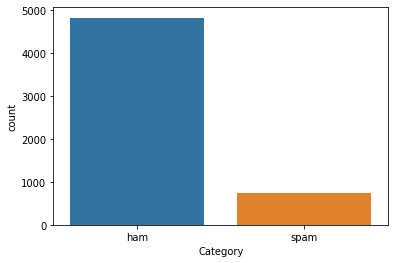

In [8]:
ax = sns.countplot(dados["Category"])

# Treino e teste

In [9]:
X = dados['Message']
y = dados['Category']

# Preparação dos dados

In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

encoder = LabelEncoder().fit_transform(y)
vect = TfidfVectorizer().fit_transform(X)

In [11]:
encoder

array([0, 0, 1, ..., 0, 0, 0])

In [12]:
vect

<5572x8709 sparse matrix of type '<class 'numpy.float64'>'
	with 74098 stored elements in Compressed Sparse Row format>

In [13]:
from sklearn.model_selection import train_test_split,cross_val_score

X_train, X_test, y_train, y_test = train_test_split(vect, encoder, test_size=0.2, random_state=42)

In [14]:
X_train.shape

(4457, 8709)

In [15]:
y_train.shape

(4457,)

# Naive Bayes

In [16]:
from sklearn.naive_bayes import MultinomialNB

naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)
naive_score = naive_bayes.score(X_train, y_train)
print("Score Naive Bayes: %.2f" % (naive_score * 100))

Score Naive Bayes: 96.95


# Modelo previsão do Naive Bayes

In [17]:
naive_bayes_pred = naive_bayes.predict(X_test)
naive_bayes_pred

array([0, 0, 0, ..., 0, 0, 0])

In [18]:
from sklearn.metrics import accuracy_score

acuracia = accuracy_score(y_test, naive_bayes_pred)
print("Acuracia: %.2f" % (acuracia * 100))

Acuracia: 96.50


# Random Forest


In [19]:
from sklearn.ensemble import RandomForestClassifier

Random = RandomForestClassifier()
Random.fit(X_train, y_train)
random_score = Random.score(X_train, y_train)
print("Score Random Forest: %.2f" % (acuracia * 100))

C:\Users\RafaelHenriqueGallo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Score Random Forest: 96.50


# Modelo previsão do Random Forest

In [20]:
random_pred = Random.predict(X_test)
random_pred

array([0, 0, 0, ..., 0, 0, 0])

# Matriz de confusão

Random forest


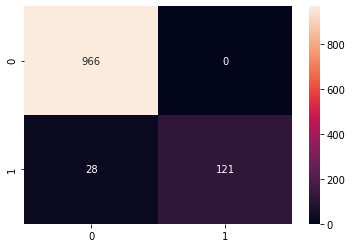

In [21]:
from sklearn.metrics import confusion_matrix

matrix1 = confusion_matrix(y_test, random_pred)
matrix2 = confusion_matrix(y_test, naive_bayes_pred)

matrix = sns.heatmap(matrix1, annot = True, fmt = '');
print("Random forest")

Naive bayes


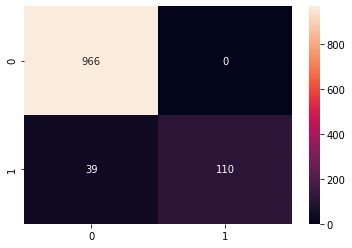

In [22]:
matrix = sns.heatmap(matrix2, annot = True, fmt = "")
print("Naive bayes")

In [23]:
from sklearn.metrics import classification_report

rep = classification_report(y_test, naive_bayes_pred)
print("\n\n Classificação Naive bayes\n")
print(rep)

rep = classification_report(y_test, random_pred)
print("\n\n Classificação Random forest\n")
print(rep)



 Classificação Naive bayes

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.74      0.85       149

    accuracy                           0.97      1115
   macro avg       0.98      0.87      0.91      1115
weighted avg       0.97      0.97      0.96      1115



 Classificação Random forest

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       966
           1       1.00      0.81      0.90       149

    accuracy                           0.97      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.97      0.97      1115

